<a href="https://colab.research.google.com/github/ttnok/c-programming-on-colab/blob/main/%E6%8E%88%E6%A5%AD%E8%B3%87%E6%96%99/C%E8%A8%80%E8%AA%9E%E6%BC%94%E7%BF%92%E7%AC%AC14%E5%9B%9E%E7%9B%AE2022_01_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

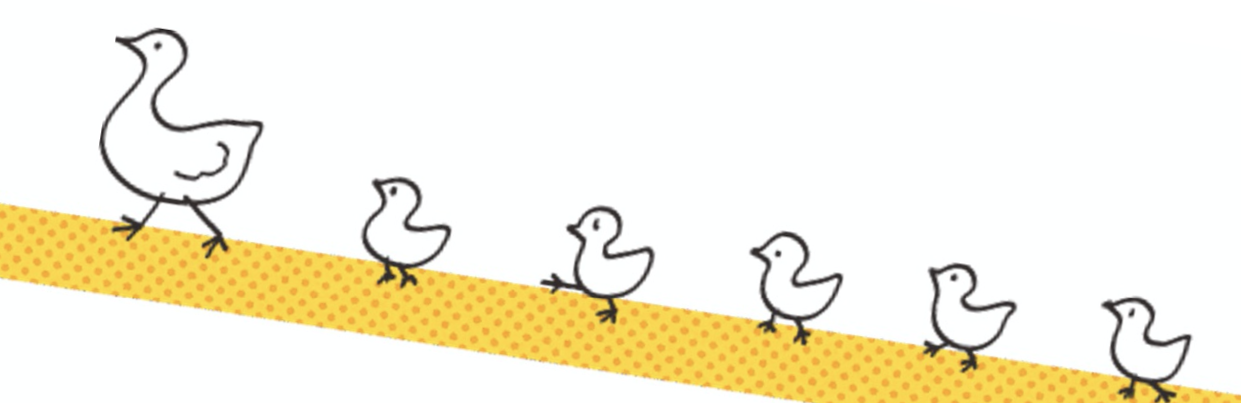


# C 言語演習 第 14 回（最終回）
2022-01-18 M 科 C 組

※ 「ドライブにコピー」を忘れずに。

※ 「Colab Notebooks」フォルダ確認： https://drive.google.com/


## 総合演習（配点 20 点）

* リダイレクション
* 最大値と最小値
* （擬似）乱数の発生

# §0. リダイレクション（予習内容）



## 例題 0.1

データファイル作成

※ 負の値は入力終了を表す（その行はデータではない）。

In [ ]:
%%file 14data.txt
12 162.5 65.0
215 182.0 76.3
379 154.5 51.0
-1 -1 -1

Writing 14data.txt


In [ ]:
%%file 14height-weight.c
#include <stdio.h>

int main(void)
{
    int id;
    double height, weight;

    //printf("+------+----------+----------+\n");
    //printf("| No   | 身長[cm] | 体重[kg] |\n");
    //printf("+------+----------+----------+\n");

    for (;;)
    {
        scanf("%d %lf %lf", &id, &height, &weight);
        if (id < 0) break;

        printf("| %04d |   %.1f  |    %3.1f  |\n",
               id, height, weight);
    }

    //printf("+------+----------+----------+\n");

    return 0;
}

コンパイル

In [ ]:
!clang 14height-weight.c -o height-weight

実行（入力はファイルから）

In [ ]:
!./height-weight

## 問題 0.1 ★☆☆

例題 0.1 の結果の表に次のように BMI の計算結果を追加せよ。
BMI はプログラム内でデータを 1 レコード読み込むたびにその場で計算せよ。
入力データを書き換えてはいけない。

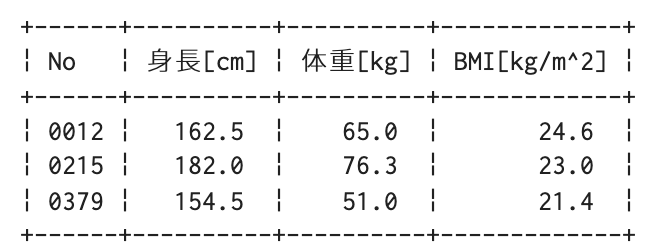

コード（ファイル名： `14bmi.c`）

コンパイル

実行（14data.txt を入力）

## Q.0-1 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=14-0-1&cl=mc">Yes</a></button>
<button class="clicker_button"><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=14-0-1&cl=mc">No</a></button>

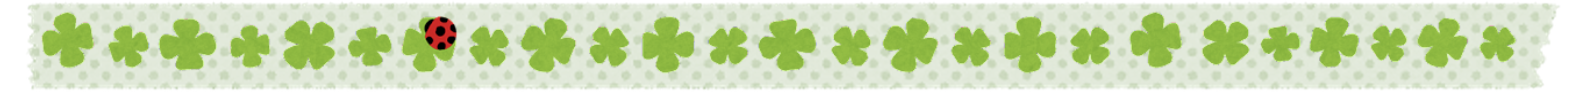

# §1. 最大値、最小値

## 例題 1.1

入力した値の最大値を求めよ。
ただし、入力値はすべて正の値であるとし、0 以下の値は入力終了を表すとする。

In [ ]:
%%file 14data2.txt
165 176 189 134 -1

コード

In [ ]:
%%file 14max.c
#include <stdio.h>

int main(void)
{
    double height, max;
 
    max = 0;  // 入力はすべて 0 より大きいはず。それらより小さい値を初期値とする。
    for (;;)
    {
        scanf("%lf", &height);
        if (height <= 0) break;
     
        if (height > max)
        {
            max = height;
        }
        else
        {
            // なにもしない
        }
    }
 
    printf("最大値は %.1f です。\n", max);

    return 0;
}

コンパイルと実行

In [ ]:
!clang 14max.c && ./a.out

## 問題 1.1 ★☆☆

例 1.1 を書き換えて、最小値を求めるプログラムを作成せよ。


ソースコード（ファイル名： `14min.c`）

コンパイルと実行（入力データは `14data2.txt`）

## Q.1-1 問題 1.1 はできましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=14-1-1&cl=mc">Yes</a></button>
<button class="clicker_button"><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=14-1-1&cl=mc">No</a></button>

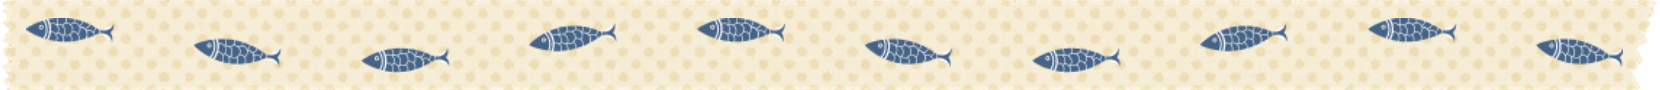

# §2. 大量データの最大値、最小値


## 問題 2.1 ★☆☆

次のデータについて最大値を求めよ。
-1 はデータの終了を表すとする。

※ 例題 1.1 とほぼ同じ。扱うファイルが違う。

In [ ]:
%%file 14data3.txt
154.6 189.8 148.0 166.8 171.3 174.7 165.3 174.8 190.7 170.4 170.0 166.6 158.2 163.9 178.0 173.3 170.4 152.4 161.5 170.8 156.7 170.5 160.7 154.6 179.2 175.8 180.9 168.5 168.0 176.7 165.6 170.2 159.7 158.4 175.6 174.7 180.6 176.1 167.3 163.4 179.5 163.8 178.8 187.4 175.7 158.3 170.3 165.2 168.6 167.8 174.0 177.9 170.3 183.1 163.4 147.3 159.7 183.2 195.3 180.8 152.4 165.7 174.7 173.3 166.6 171.0 158.2 172.2 150.0 179.1 170.4 161.4 160.5 182.3 163.4 183.5 181.4 160.9 174.7 169.4 171.6 171.2 172.8 147.5 164.2 164.3 173.7 163.7 159.5 152.5 179.4 171.9 153.5 178.0 169.4 169.4 159.5 165.0 173.8 175.5 176.5 172.4 173.4 171.6 163.6 172.3 149.4 163.1 168.1 164.7 166.8 182.6 168.3 176.6 174.5 174.2 170.1 169.4 164.1 190.9 161.0 182.8 174.4 166.3 167.8 171.5 169.0 171.3 163.9 165.4 150.9 168.7 175.9 187.1 175.6 155.0 161.8 172.5 168.2 173.2 167.4 169.7 166.9 177.0 183.3 164.9 159.1 172.5 160.4 172.5 157.2 176.3 165.6 173.1 172.1 168.2 166.8 171.7 162.4 173.1 175.2 160.0 167.2 165.2 180.5 167.0 172.6 154.4 168.6 172.5 165.3 165.1 160.8 168.4 171.9 168.2 168.2 176.8 170.9 180.5 167.0 155.6 171.5 165.8 165.0 159.3 174.1 191.9 158.1 168.3 165.6 165.3 174.9 172.0 170.9 165.9 182.1 179.8 193.7 168.7 165.9 180.4 169.8 152.5 169.9 168.0 160.0 177.7 188.6 156.1 169.9 193.9 177.3 172.6 175.7 178.4 167.4 193.2 186.7 166.6 190.0 170.1 161.9 174.9 174.2 162.8 174.7 168.7 154.2 177.3 144.0 164.8 158.3 171.9 168.7 169.5 184.0 171.8 182.8 163.4 175.6 181.2 170.4 153.4 174.1 158.6 171.0 175.1 161.6 159.6 179.3 182.3 176.9 160.5 170.8 169.8 162.9 168.6 180.2 173.9 180.8 179.1 177.0 176.2 176.3 160.9 152.7 188.5 171.7 178.5 164.6 158.2 170.7 172.9 182.4 152.5 167.9 175.2 160.6 174.4 181.4 169.7 189.6 176.9 167.7 184.5 180.3 160.8 185.0 167.9 172.5 180.4 172.6 166.9 176.9 169.6 173.5 174.5 157.9 177.5 166.7 178.6 168.7 186.4 191.3 159.1 170.2 168.2 158.4 168.9 159.8 167.0 170.0 157.0 165.7 172.3 178.5 162.0 185.4 162.7 179.2 182.1 161.1 186.7 169.0 166.4 167.6 181.2 172.5 153.3 165.3 153.9 176.1 160.0 184.7 189.8 177.3 160.9 172.6 163.7 161.5 150.9 167.8 182.1 174.7 163.5 182.3 155.6 166.7 168.9 173.9 174.2 167.0 178.2 167.2 168.3 165.5 164.2 163.3 169.3 151.5 163.4 166.0 176.6 168.7 168.1 180.0 167.9 191.1 154.5 170.1 161.5 181.2 191.4 154.8 168.6 179.0 166.1 162.0 169.1 178.5 168.9 168.1 174.8 171.7 168.6 159.6 172.1 184.0 181.2 174.1 169.7 154.0 151.8 168.9 164.8 167.8 157.6 162.3 156.5 158.5 174.3 169.8 181.4 156.3 166.5 178.5 169.6 177.5 165.3 178.0 169.3 179.7 171.2 168.7 181.3 180.6 175.1 172.2 178.6 171.5 191.4 163.4 164.6 171.2 176.8 172.8 161.4 166.5 181.9 167.6 146.4 163.2 181.6 174.7 166.4 160.7 177.1 157.1 175.0 165.8 176.2 179.7 188.8 181.7 169.5 176.9 150.5 166.7 166.8 173.1 176.0 164.0 156.7 178.8 148.1 186.1 166.4 170.3 162.0 185.2 177.3 173.1 174.4 175.0 168.6 160.4 166.9 168.6 175.8 161.9 166.4 174.6 181.3 164.7 183.7 177.3 164.7 163.3 179.2 176.8 175.4 164.7 168.4 164.6 175.9 167.1 167.6 177.8 183.1 169.8 175.7 163.3 198.2 168.7 164.8 173.3 190.2 183.0 193.5 163.9 167.1 162.3 171.0 155.2 172.7 175.4 152.3 174.7 199.5 179.0 178.4 159.1 161.8 171.8 155.6 170.6 164.8 157.5 180.2 163.0 172.0 169.4 169.5 161.6 176.8 167.2 181.5 163.5 165.6 159.1 174.3 175.2 169.8 169.3 188.2 179.1 156.6 166.4 158.8 167.4 166.5 180.3 178.1 168.4 183.2 172.3 160.5 171.1 157.3 180.5 164.7 165.0 161.6 163.1 160.0 177.1 185.6 153.5 180.0 177.0 158.4 175.4 157.2 188.7 157.3 138.7 174.5 156.4 174.9 168.3 159.7 166.2 165.6 158.4 168.5 170.8 163.9 154.5 161.3 151.4 164.8 175.8 168.2 171.1 169.3 168.8 155.8 150.6 176.2 180.3 166.7 172.0 172.3 179.2 162.0 188.9 164.4 183.6 167.3 166.1 192.6 176.7 173.3 173.4 146.3 183.4 161.8 160.2 177.6 176.0 163.8 188.3 170.6 175.1 165.5 184.1 150.4 159.6 189.1 161.8 151.2 178.1 167.4 174.4 176.1 175.3 182.9 150.0 175.1 173.5 161.6 170.4 161.1 170.5 170.4 176.9 168.3 178.4 177.1 175.9 160.9 168.5 183.8 164.1 178.0 171.0 167.2 174.0 162.2 151.5 179.0 149.1 159.5 177.0 167.8 175.3 190.7 175.8 172.1 167.2 146.9 181.0 174.2 166.4 164.4 172.8 164.1 147.8 178.2 165.3 173.3 174.7 164.7 171.5 183.4 154.4 172.6 162.9 165.0 173.8 176.2 156.3 163.2 171.4 181.8 188.1 168.9 178.1 175.4 172.2 176.5 166.8 163.1 136.1 160.8 156.6 156.3 181.8 181.0 167.2 177.8 177.9 167.6 179.1 177.0 184.7 167.2 163.8 158.9 159.0 169.7 193.3 163.0 168.6 161.7 174.3 166.4 170.3 169.8 165.3 172.8 175.1 168.0 164.7 181.0 168.1 160.3 174.6 182.9 160.5 171.7 166.2 167.4 172.9 172.9 176.0 160.5 161.2 149.9 165.4 167.2 175.4 176.0 169.2 167.8 172.2 165.3 183.3 165.5 168.9 179.9 194.2 174.5 169.2 157.2 157.7 168.8 169.0 176.0 175.6 158.2 163.1 155.0 171.7 164.1 177.8 170.7 183.6 178.9 175.2 176.0 186.0 160.3 158.5 175.6 177.2 166.6 156.2 172.8 158.9 184.7 174.2 166.5 165.9 169.5 167.7 153.3 172.0 182.4 169.3 188.0 162.3 177.9 168.0 182.3 170.6 172.0 173.7 171.6 154.6 188.8 172.5 172.6 158.9 168.6 170.8 158.4 168.2 167.4 171.3 186.6 168.6 172.8 159.7 159.0 181.1 175.0 174.5 171.4 192.2 158.8 164.7 185.0 179.7 170.8 174.9 174.5 182.5 164.2 171.0 179.9 191.9 176.4 178.1 166.4 170.2 155.8 161.5 169.8 171.1 169.6 165.9 160.7 186.0 156.8 160.6 162.1 166.7 166.1 163.4 167.7 176.7 154.7 193.3 178.4 172.4 191.4 167.3 158.4 172.2 163.4 155.9 164.8 154.9 174.9 176.0 170.3 177.4 165.5 183.9 150.0 170.1 163.4 171.9 168.4 167.3 174.7 163.6 182.2 167.1 171.6 172.4 158.9 163.1 166.5 177.3 193.2 186.8 162.6 182.4 170.1 174.3 182.4 193.3 174.6 165.5 169.9 179.9 165.5 158.0 143.4 184.2 186.7 163.3 174.7 166.3 182.1 183.3 165.8 176.2 187.3 146.8 169.4 171.1 174.5 169.5 169.7 189.5 186.4 169.0 147.8 169.2 176.8 174.7 147.6 170.1 166.0 156.2 165.9 171.1 169.0 184.8 158.7 160.5 164.2 172.6 164.4 158.3 164.0 173.3 176.2 159.9 170.0 177.9 182.6 168.0 179.2 174.5 166.4 166.1 163.5 164.0 182.3 172.6 167.9 160.0 172.4 177.4 170.7 164.8 185.1 161.1 141.1 165.3 175.2 168.3 168.0 164.9 171.3 165.5 165.1 171.9 154.3 145.4 170.3 168.8 164.1 156.7 184.5 162.0 149.0 163.7 182.9 175.4 167.5 170.6 146.8 177.0 165.6 192.0 165.8 159.1 161.6 169.2 166.2 165.2 183.2 174.5 180.1 -1

コード（ファイル名： `14max2.c`）

コンパイル

実行（データはファイル `14data3.txt` をリダイレクトして入力する）

## Q.2-1 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=14-2-1&cl=mc">yes</a></button>
<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=14-2-1&cl=mc">no</a></button>


## 問題 2.2 ★★☆

同じデータ（`14data3.txt`）について最小値およびデータの大きさを（プログラムによって）求めよ。
-1 はデータの終了を表すとする。この -1 という要素はカウントしない。

コード（ファイル名： `14min2.c`）

コンパイル

実行（データはファイル `14data2.txt` をリダイレクトして入力する）

## Q.2-2 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=14-2-2&cl=mc">yes</a></button>
<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=14-2-2&cl=mc">no</a></button>


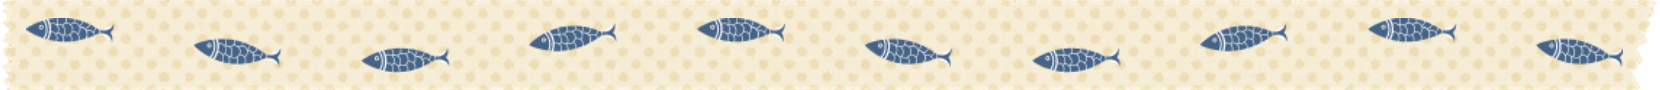

# §3. 乱数の利用



## 例題 3.1

`rand` 関数を利用して乱数を生成する。
0 から `RAND_MAX` の整数値を（擬似的に）ランダムに生成する。

In [ ]:
%%file 14random1.c
#include <stdio.h>
#include <stdlib.h>  // rand, srand 関数を利用するために必要

int main(void)
{
    int secret;
    int i;
 
    //printf("%d\n", RAND_MAX); // rand 関数の返り値として得られる可能性のある乱数の最大値

    for (i = 1; i <= 10; i++)
    {
        secret = rand();
        printf("%d\n", secret);
    }

    return 0;
}

コンパイルと実行

In [ ]:
!gcc 14random1.c && ./a.out

## 例題 3.2

上記のプログラムだと、いつも同じ列が生成されるので、乱数の種（シード）を毎回変更する。
シードとしては UNIX 時間（1970 年 1 月 1 日 00:00:00 からの現在までの経過秒数）を利用する（ことがよく行われる）。

In [ ]:
%%file 14random2.c
#include <stdio.h>
#include <stdlib.h>  // rand, srand 関数を利用するために必要
#include <time.h>    // time 関数を利用するために必要

int main(void)
{
    int secret;
    int i;
 
    srand((unsigned int)time(NULL)); // srand 関数により乱数シードの設定をする

    for (i = 1; i <= 10; i++)
    {
        secret = rand() % 100;
        printf("%d\n", secret);
    }

    return 0;
}

In [ ]:
!gcc 14random2.c && ./a.out

## 例題 3.3

以前、登場した数当てゲームをもっとましなゲームにしてみる。

In [ ]:
%%file 14guess1.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main(void)
{
    int secret;
    int your_answer = -1;
 
    srand((unsigned int)time(NULL));
 
    secret = rand() % 100;

    printf("秘密の数を当ててください。\n");
    printf("0 から 99 の整数です。\n");

    for (;;)
    {
        printf("あなたの予想： ");
        scanf("%d", &your_answer);
     
        if (your_answer < secret)
        {
            printf("それより大きい！\n");
        }
        else if (your_answer > secret)
        {
            printf("それより小さい！\n");
        }
        else
        {
            printf("🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉\n");
            printf("🎉🎉🎉　　当り　　🎉🎉🎉\n");
            printf("🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉\n");
        }
    }

    return 0;
}

In [ ]:
!clang 14guess1.c && ./a.out

## 問題 3.1 ★★☆

例 3.3 について、次の 2 点を改良せよ。

1. 正解がでたらプログラムを終了する。
2. 正解するまでに何回答えたかをプログラム終了前に表示する。

コード（ファイル名： `14guess2.c`）

コンパイル、実行

## Q.3-1 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=14-3-1&cl=mc">yes</a></button>
<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=14-3-1&cl=mc">no</a></button>


## 参考： UNIX 時間についての 2038 年問題

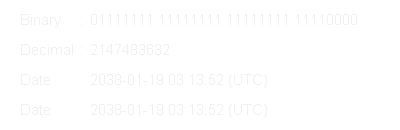

cf. [2038 年問題 - Wikipedia](https://ja.wikipedia.org/wiki/2038%E5%B9%B4%E5%95%8F%E9%A1%8C) 

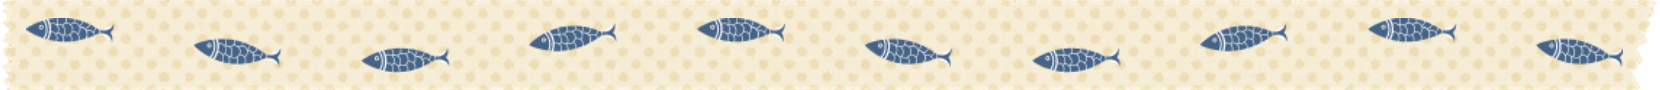

# §4. 乱数を利用した図形の描画

まずは、ユーティリティ関数群を記述したファイルを作成します。
実行ボタンを押してください。

これは本体のプログラムの方で include します。

In [ ]:
%%file svgrects.c
#include <stdio.h>
static double ymax;

void plot_start(int x, int y)  /* プロット開始 */
{
    printf("<svg xmlns=\"http://www.w3.org/2000/svg\" ");
    printf("xmlns:xlink=\"http://www.w3.org/1999/xlink\" viewBox=\"0 0 %d %d\">\n",
           x, y);
    ymax = y;
}

void plot_end(int close)  /* プロット終了 */
{
    printf("</svg>\n");
}

void rect(double x, double y, double width, double height, double h, double s, double l, double a)
{
    printf("<rect x=\"%g\" y=\"%g\" width=\"%g\" height=\"%g\" fill=\"hsla(%g,%g%%,%g%%,%g)\"/>\n",
           x, ymax - y, width, height, h, s, l, a);
}


## 例題 4.1

800 x 800 のキャンパスの縦方向の座標が 400 の位置に一辺の長さが 100 の正方形をランダムに描け（横方向の位置がランダム）。

ソースコード

In [ ]:
%%file 14random_squares.c
#include "svgrects.c"
#include <stdlib.h>
#include <time.h>

int main(void)
{
    double x, y, r;
    double h, s, l; // h:色相、s:彩度、l:明度
    double a;  // a:α値（透明度、0 が透明）
    int i, j;

    srand((unsigned int)time(NULL));
 
    plot_start(800, 800);

    for (i = 1; i <= 10; i++)
    {
        x = 800.0 * rand() / RAND_MAX;
        y = 400.0;
        r = 100.0; // 正方形の辺の長さ
        h = 180.0; // 色相： 0 から 360
        s = 50.0;  // 彩度： 0 から 100
        l = 50.0;  // 明度： 0 から 100
        a = 0.8; // α値： 0 から 1
        rect(x, y, r, r, h, s, l, a);
    }

    plot_end(0);

    return 0;
}

コンパイル & 実行、その結果を `squares1.svg` に書き出す。

In [ ]:
!clang 14random_squares.c && ./a.out > squares1.svg

`squares1.svg` を描画

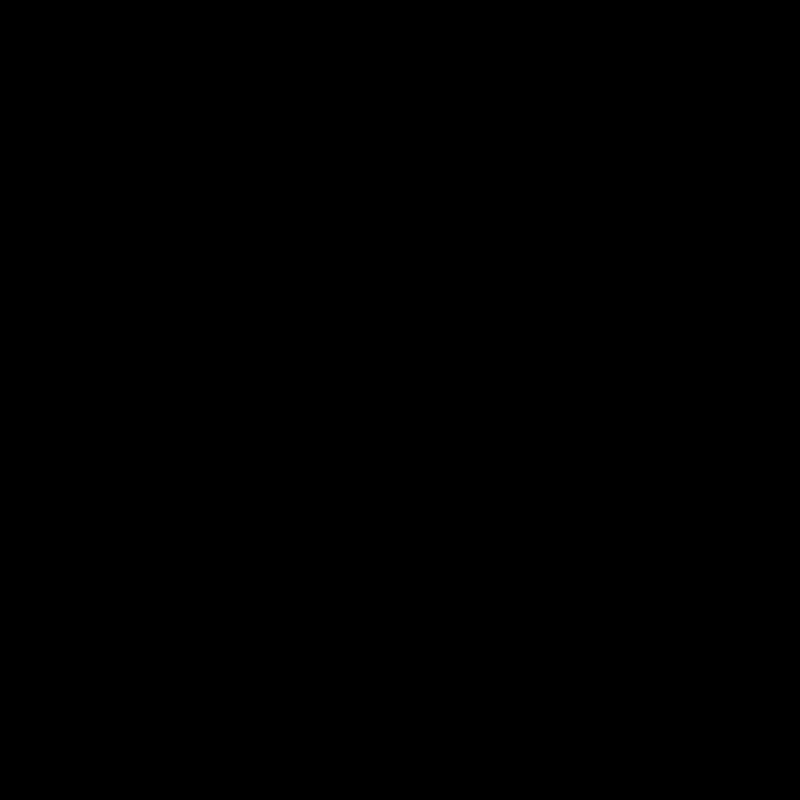

In [ ]:
from IPython.display import SVG, display_svg
display_svg(SVG('squares1.svg'))

## 問題 4.1

例題 4.1 の正方形の y 座標をランダム化せよ。
さらに、h（色相）もランダム化せよ。

コード

コンパイル、実行、ファイルへの書き出し（ファイル名 `squares2.svg`）

描画

In [ ]:
from IPython.display import SVG, display_svg
display_svg(SVG('squares2.svg'))

## Q.4-1 できましたか？

<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=yes&q=14-4-1&cl=mc">yes</a></button>
<button><a href="https://script.google.com/a/macros/oit.ac.jp/s/AKfycby1U3i2E0AXImNZZUrLAabBscit9qAgx0Sy8LhE75mPQr-_LXU-hyI4Ol05ZWYTw6-WAA/exec?ans=no&q=14-4-1&cl=mc">no</a></button>


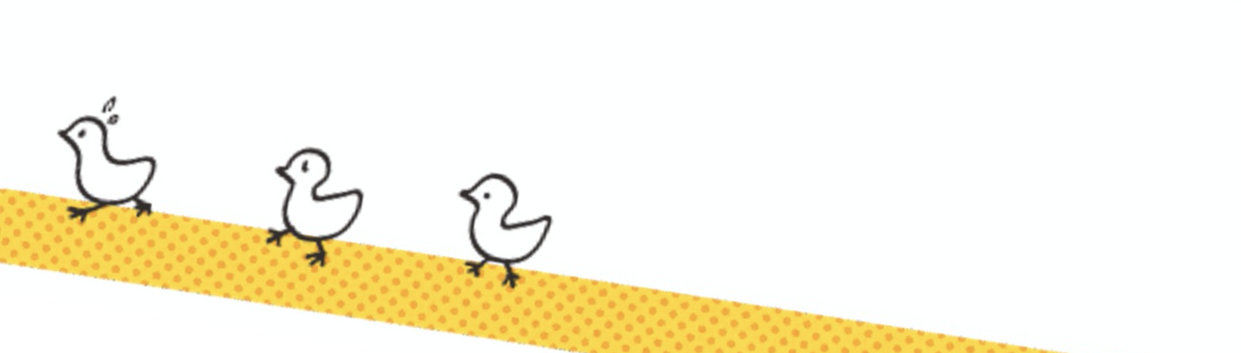